RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
file_path = "C:/Users/chimc/Desktop/Thomsun Infocare/capricorn UAT data/data2024.csv"
df = pd.read_csv(file_path,  encoding='ISO-8859-1')

In [3]:
# Convert invoice date to datetime format
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

# Extract date-based features
df['year'] = df['invoicedate'].dt.year
df['month'] = df['invoicedate'].dt.month
df['day'] = df['invoicedate'].dt.day
df['weekday'] = df['invoicedate'].dt.weekday

# Define features and target variable
X = df[['year', 'month', 'day', 'weekday', 'qty', 'avgunitprice', 'totaldiscount']]
y = df['salesamount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [5]:
y_pred = rf_model.predict(X_test)


In [6]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
relative_error = (mae / np.mean(y_test)) * 100
pseudo_accuracy = 100 - relative_error

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Relative Error: {relative_error:.2f}%")
print(f"Pseudo-Accuracy (100 - Relative Error): {pseudo_accuracy:.2f}%")


Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.68
Root Mean Squared Error (RMSE): 0.82
R² Score: 1.00
Relative Error: 0.05%
Pseudo-Accuracy (100 - Relative Error): 99.95%


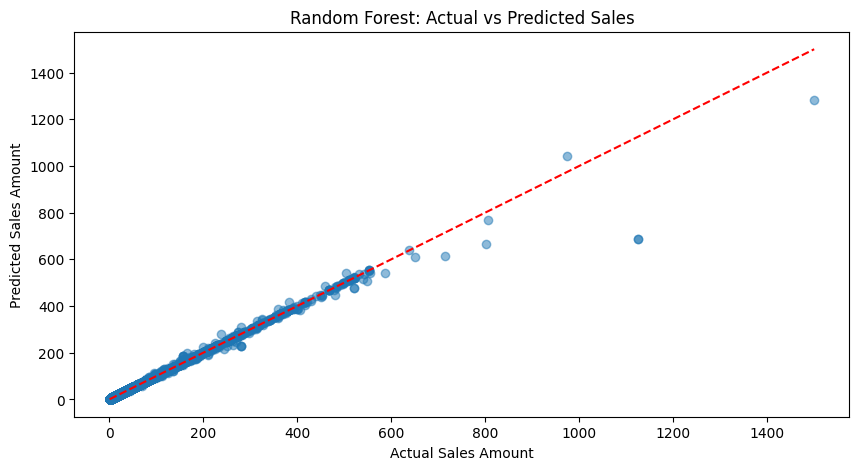

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Sales Amount")
plt.ylabel("Predicted Sales Amount")
plt.title("Random Forest: Actual vs Predicted Sales")
plt.show()


RANDOM FOREST WITH LAG FEATURES

In [8]:
# Sort data by date
df = df.sort_values(by="invoicedate")

# Create lag features
df['sales_lag_1'] = df['salesamount'].shift(1)
df['sales_lag_7'] = df['salesamount'].shift(7)
df['sales_lag_30'] = df['salesamount'].shift(30)

# Fill missing values with 0 (optional: you can use mean or forward-fill)
df.fillna(0, inplace=True)


In [9]:
# Define features and target
X = df[['year', 'month', 'day', 'weekday', 'qty', 'avgunitprice', 'totaldiscount', 
        'sales_lag_1', 'sales_lag_7', 'sales_lag_30']]
y = df['salesamount']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
relative_error = (mae / np.mean(y_test)) * 100
pseudo_accuracy = 100 - relative_error

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Relative Error: {relative_error:.2f}%")
print(f"Pseudo-Accuracy (100 - Relative Error): {pseudo_accuracy:.2f}%")

Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.77
Root Mean Squared Error (RMSE): 0.88
R² Score: 1.00
Relative Error: 0.05%
Pseudo-Accuracy (100 - Relative Error): 99.95%


RANDOM FOREST WITH LAGS AND MONTH DUMMIES

In [13]:
# One-hot encode the month column
df = pd.get_dummies(df, columns=['month'], prefix='month')

In [14]:
# Define features and target
X = df[['year', 'day', 'weekday', 'qty', 'avgunitprice', 'totaldiscount',
        'sales_lag_1', 'sales_lag_7', 'sales_lag_30'] + 
       [col for col in df.columns if col.startswith('month_')]]  # Include month dummies

y = df['salesamount']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
relative_error = (mae / np.mean(y_test)) * 100
pseudo_accuracy = 100 - relative_error

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Relative Error: {relative_error:.2f}%")
print(f"Pseudo-Accuracy (100 - Relative Error): {pseudo_accuracy:.2f}%")

Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.77
Root Mean Squared Error (RMSE): 0.88
R² Score: 1.00
Relative Error: 0.05%
Pseudo-Accuracy (100 - Relative Error): 99.95%


Random forest gives great accuracy but takes long to process.